# Setting

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "/home/work/tkoike/dac2024_data/"
models = ["vgg16", "resnet50", "xception", "efficientnetv2s"]

# Accuracy

In [81]:
def extract_number(label):
    return int(label.split("_")[-1])

def accuracy(predicted_matrix):
    # make true labels
    true_labels = predicted_matrix.index.map(extract_number)

    # Determine predicted labels by selecting the column with the highest probability
    predictions = predicted_matrix.idxmax(axis=1).astype(int)

    # Compute accuracy, recall and precision
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions, average="macro")
    precision = precision_score(true_labels, predictions, average="macro")
    return accuracy, recall, precision


## CIFAR-10

In [83]:
accuracy_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
recall_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
precision_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
file_name_dict = {"cnn_model": "cifar10-predict.h5", "primo": "primo_simulations.h5", "proposed": "triplet_simulations.h5"}

for model in models:
    for key in file_name_dict.keys():
        data=pd.read_hdf(data_dir+"/cifar10/simulation/"+model+"/"+file_name_dict[key])
        acc, rec, prec = accuracy(data)
        accuracy_data.loc[model, key] = acc
        recall_data.loc[model, key] = rec
        precision_data.loc[model, key] = prec

print("Accuracy:")
print(accuracy_data)
print("Recall:")
print(recall_data)
print("Precision:")
print(precision_data)

Accuracy:
                cnn_model   primo proposed
vgg16               0.854  0.8653   0.8652
resnet50           0.9274  0.9291   0.9326
xception           0.7834  0.7918   0.7936
efficientnetv2s    0.9474  0.9492   0.9489
Recall:
                cnn_model   primo proposed
vgg16               0.854  0.8653   0.8652
resnet50           0.9274  0.9291   0.9326
xception           0.7834  0.7918   0.7936
efficientnetv2s    0.9474  0.9492   0.9489
Precision:
                cnn_model     primo  proposed
vgg16            0.857916  0.865306  0.865095
resnet50         0.928362  0.929077   0.93255
xception         0.784958  0.791486  0.793452
efficientnetv2s  0.947404  0.949216  0.948831


## CIFAR-100

In [112]:
accuracy_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
recall_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
precision_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed"])
file_name_dict = {"cnn_model": "cifar100-predict.h5", "primo": "primo_simulations.h5", "proposed": "triplet_simulations.h5"}

for model in models:
    for key in file_name_dict.keys():
        data=pd.read_hdf(data_dir+"/cifar100/simulation/"+model+"/"+file_name_dict[key])
        acc, rec, prec = accuracy(data)
        accuracy_data.loc[model, key] = acc
        recall_data.loc[model, key] = rec
        precision_data.loc[model, key] = prec

print("Accuracy:")
print(accuracy_data)
print("Recall:")
print(recall_data)
print("Precision:")
print(precision_data)

cifar100_acc_data = accuracy_data

Accuracy:
                cnn_model   primo proposed
vgg16              0.6305  0.4055   0.5105
resnet50           0.7115  0.5137   0.6534
xception           0.7489  0.6623   0.7052
efficientnetv2s     0.814  0.7168   0.7593
Recall:
                cnn_model   primo proposed
vgg16              0.6305  0.4055   0.5105
resnet50           0.7115  0.5137   0.6534
xception           0.7489  0.6623   0.7052
efficientnetv2s     0.814  0.7168   0.7593
Precision:
                cnn_model     primo  proposed
vgg16            0.657348  0.424874  0.512231
resnet50         0.717355  0.533957  0.652369
xception         0.755639  0.675886   0.70672
efficientnetv2s  0.816029  0.731499  0.763184


# NN Recall

In [108]:
def compute_nn_recall(predicted_matrix, num_samples, num_classes):
    indices = np.zeros((num_classes, num_samples))

    for class_idx in range(num_classes):
        predicted_matrix.columns = predicted_matrix.columns.astype(int)
        sorted_indices = predicted_matrix.sort_values(class_idx, ascending=False).index
        correct_positions = np.where(sorted_indices.str.endswith(f"_{class_idx}"))[0][:num_samples] + 1
        indices[class_idx, :len(correct_positions)] = correct_positions

    return indices.mean(axis=0)      

## CIFAR-10

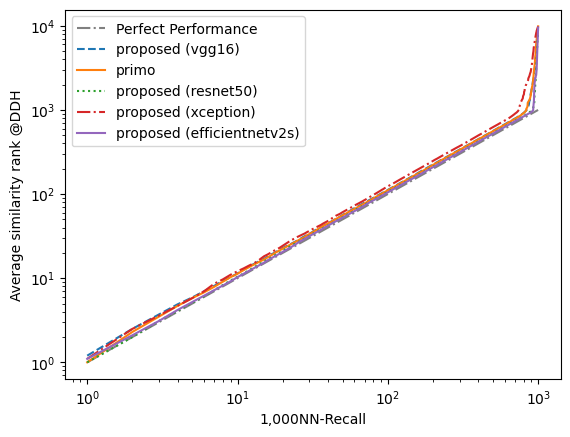

In [109]:
line_styles = ["--", ":", "-.", "-"]
num_classes = 10
num_data = 1000

plt.plot(range(1, num_data+1), range(1, num_data+1), label="Perfect Performance", color="gray", linestyle="-.")
for model in models:
    data = pd.read_hdf(data_dir+"/cifar10/simulation/"+model+"/triplet_simulations.h5")
    nn_recall = compute_nn_recall(data, num_data, num_classes)
    plt.plot(range(1, num_data+1), nn_recall, label=f"proposed ({model})", linestyle=line_styles.pop(0))
    if model == "vgg16":
        data = pd.read_hdf(data_dir+"/cifar10/simulation/"+model+"/primo_simulations.h5")
        nn_recall = compute_nn_recall(data, num_data, num_classes)
        plt.plot(range(1, num_data+1), nn_recall, label=f"primo", linestyle="-")
plt.xlabel("1,000NN-Recall")
plt.xscale("log")
plt.ylabel("Average similarity rank @DDH")
plt.yscale("log")
plt.legend()

## CIFAR-100

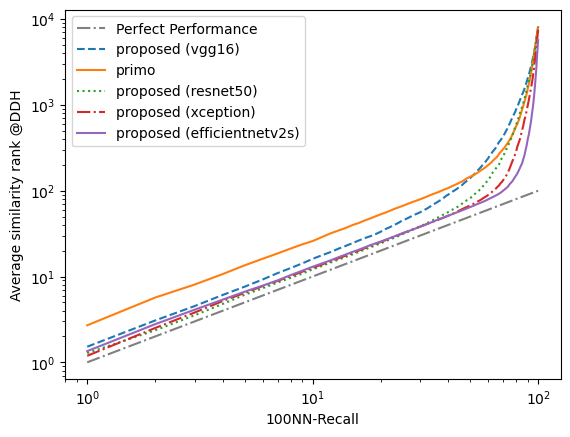

In [110]:
line_styles = ["--", ":", "-.", "-"]
num_classes = 100
num_data = 100

plt.plot(range(1, num_data+1), range(1, num_data+1), label="Perfect Performance", color="gray", linestyle="-.")
for model in models:
    data = pd.read_hdf(data_dir+"/cifar100/simulation/"+model+"/triplet_simulations.h5")
    nn_recall = compute_nn_recall(data, num_data, num_classes)
    plt.plot(range(1, num_data+1), nn_recall, label=f"proposed ({model})", linestyle=line_styles.pop(0))
    if model == "vgg16":
        data = pd.read_hdf(data_dir+"/cifar100/simulation/"+model+"/primo_simulations.h5")
        nn_recall = compute_nn_recall(data, num_data, num_classes)
        plt.plot(range(1, num_data+1), nn_recall, label=f"primo", linestyle="-")
plt.xlabel("100NN-Recall")
plt.xscale("log")
plt.ylabel("Average similarity rank @DDH")
plt.yscale("log")
plt.legend()

# Figure in Disucussion

## Visualization of DNA encoding space based on hybridization yields using t-SNE (CIFAR-10)

Text(0.5, 1.0, 'proposed (VGG-16)')

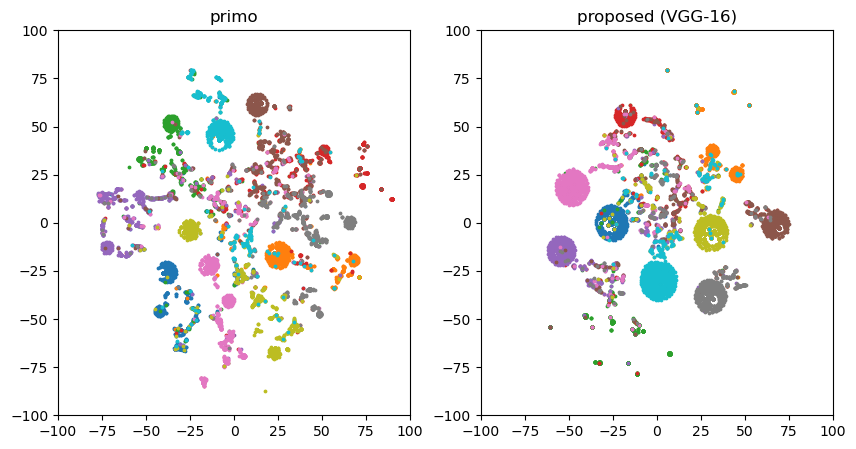

In [111]:
from sklearn.manifold import TSNE
primo = pd.read_hdf(data_dir+"/cifar10/simulation/vgg16/primo_simulations.h5")
proposed = pd.read_hdf(data_dir+"/cifar10/simulation/vgg16/triplet_simulations.h5")

tsne = TSNE(n_components=2)
primo_tsne = tsne.fit_transform(primo.values)
proposed_tsne = tsne.fit_transform(proposed.values)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(10):
    indices = np.where(primo.index.str.endswith(f"_{i}"))[0]
    ax[0].scatter(primo_tsne[indices, 0], primo_tsne[indices, 1], s=3)
    ax[1].scatter(proposed_tsne[indices, 0], proposed_tsne[indices, 1], s=3)
ax[0].set_xlim([-100,100])
ax[0].set_ylim([-100,100])
ax[1].set_xlim([-100,100])
ax[1].set_ylim([-100,100])
ax[0].set_title("primo", fontname="DejaVu Sans")
ax[1].set_title("proposed (VGG-16)", fontname="DejaVu Sans")

## Classification performance normalized by the CNN model accuracy (CIFAR-100)

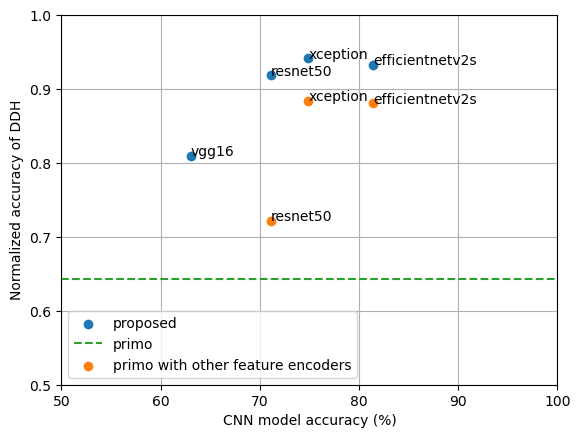

In [125]:
plt.scatter(cifar100_acc_data.cnn_model*100, cifar100_acc_data.proposed/cifar100_acc_data.cnn_model, label="proposed")
plt.hlines(cifar100_acc_data.loc["vgg16"].primo/cifar100_acc_data.loc["vgg16"].cnn_model, 50, 100, label="primo", linestyles="--", color="tab:green")
plt.scatter(cifar100_acc_data.loc[~(cifar100_acc_data.index == "vgg16")].cnn_model*100, cifar100_acc_data.loc[~(cifar100_acc_data.index == "vgg16")].primo/cifar100_acc_data.loc[~(cifar100_acc_data.index == "vgg16")].cnn_model, label="primo with other feature encoders")
for model in models:
    plt.text(cifar100_acc_data.loc[model].cnn_model*100, cifar100_acc_data.loc[model].proposed/cifar100_acc_data.loc[model].cnn_model, model, horizontalalignment="left")
    if model != "vgg16":
        plt.text(cifar100_acc_data.loc[model].cnn_model*100, cifar100_acc_data.loc[model].primo/cifar100_acc_data.loc[model].cnn_model, model, horizontalalignment="left")

plt.legend()
plt.xlabel("CNN model accuracy (%)")
plt.xlim([50, 100])
plt.ylabel("Normalized accuracy of DDH")
plt.ylim([0.5, 1])
plt.grid()